# 시계열 데이터

## TODO 이해하기
- http://www.dodomira.com/2016/04/21/arima_in_r/abs
  
- 공분산 상관계수 : https://destrudo.tistory.com/15
  
- 자기 공분산: https://m.blog.naver.com/sw4r/221030974616

- Augmented Dickey-Fuller Test : https://datascienceschool.net/view-notebook/ebb638fc880145b9adeef8dfa630f067/



## data import
- data download
```
wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

```

In [3]:
# loibrary import

import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# font set
font_path = '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=1)

In [4]:
# data import
dataset_filepath = './data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
# data type 조회
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

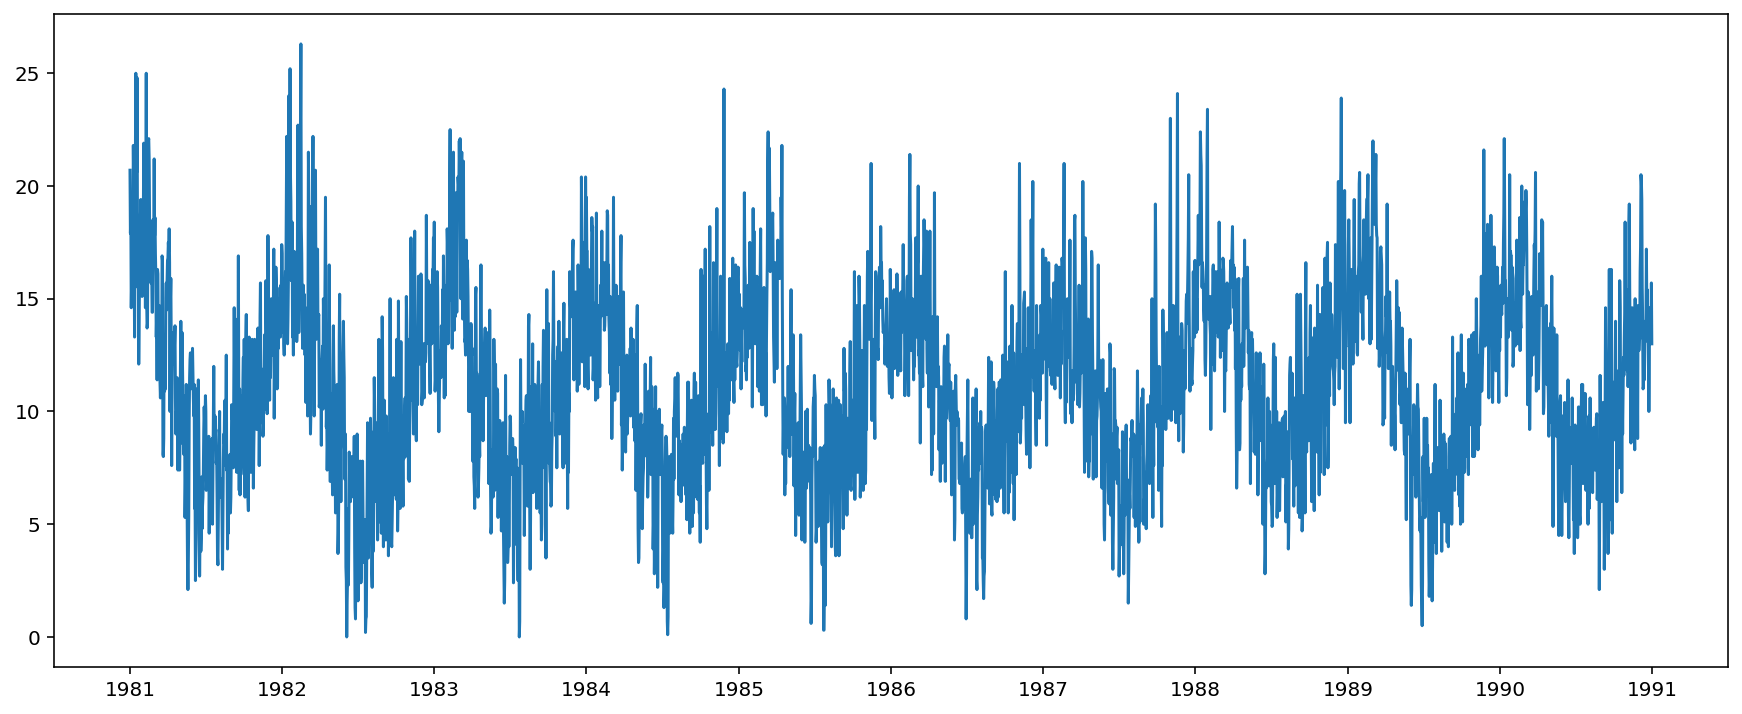

In [7]:
# 시각화
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [8]:
# data check
ts1[ts1.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

In [9]:
# 결측 데이터 발생시
# 삭제하거나 적절히 보간-대입, 

In [10]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()]    # 다시 NaN 확인

Series([], Name: Temp, dtype: float64)

## 이동평균 / 표준편차 함수 구현

In [11]:

# 일정 시간 통계치를 시각화
def plot_rolling_statistics(timeseries, window=12):

    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열
    # window 개씩 이동 평균을 냄.
    
     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    


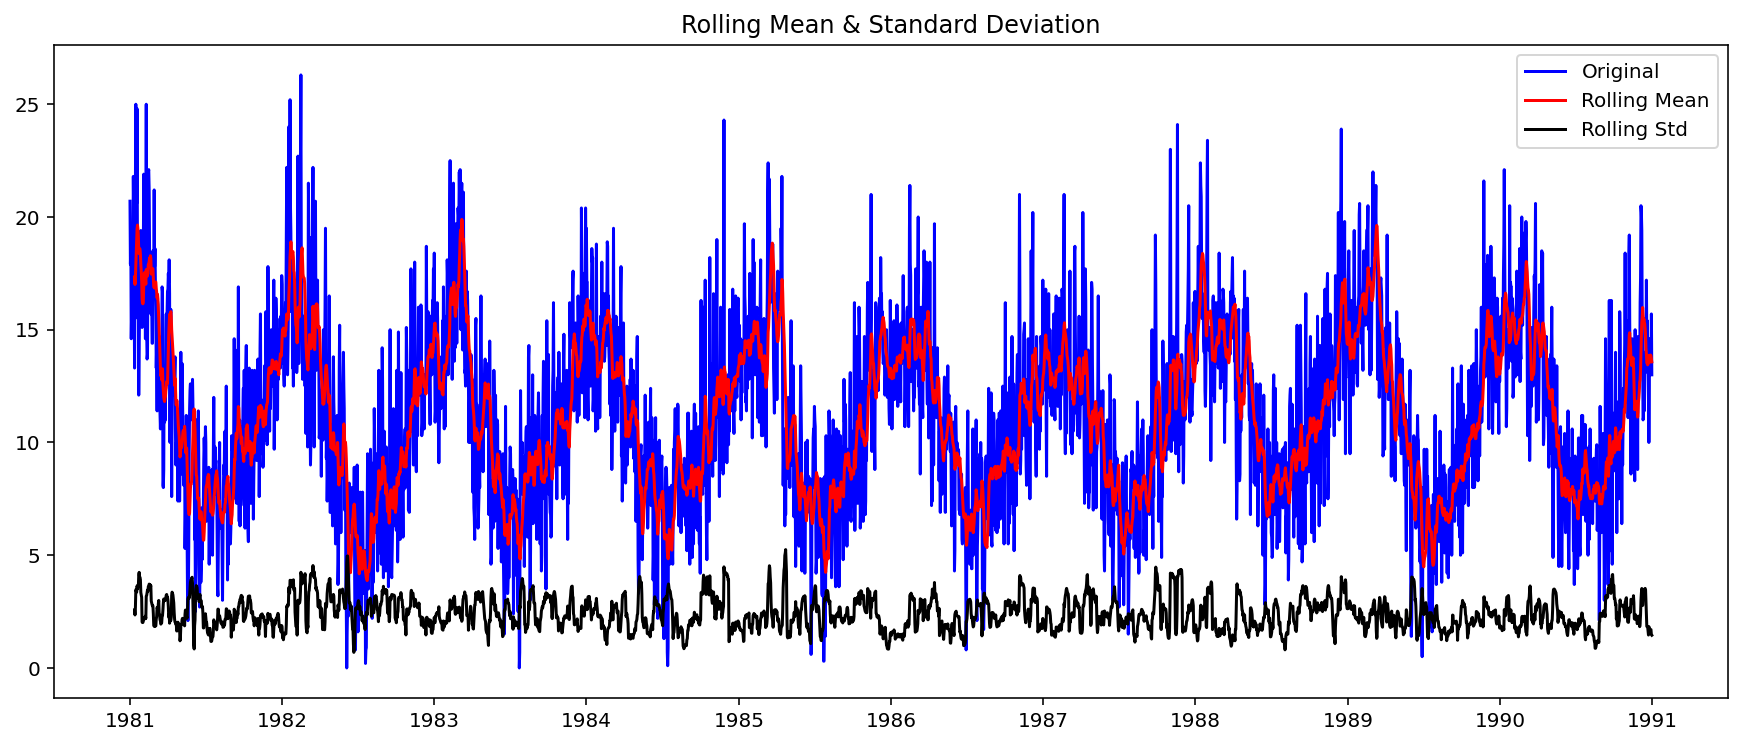

In [12]:
plot_rolling_statistics(ts1, window=12)

In [13]:
# 새로운 데이터 import

dataset_filepath = './data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


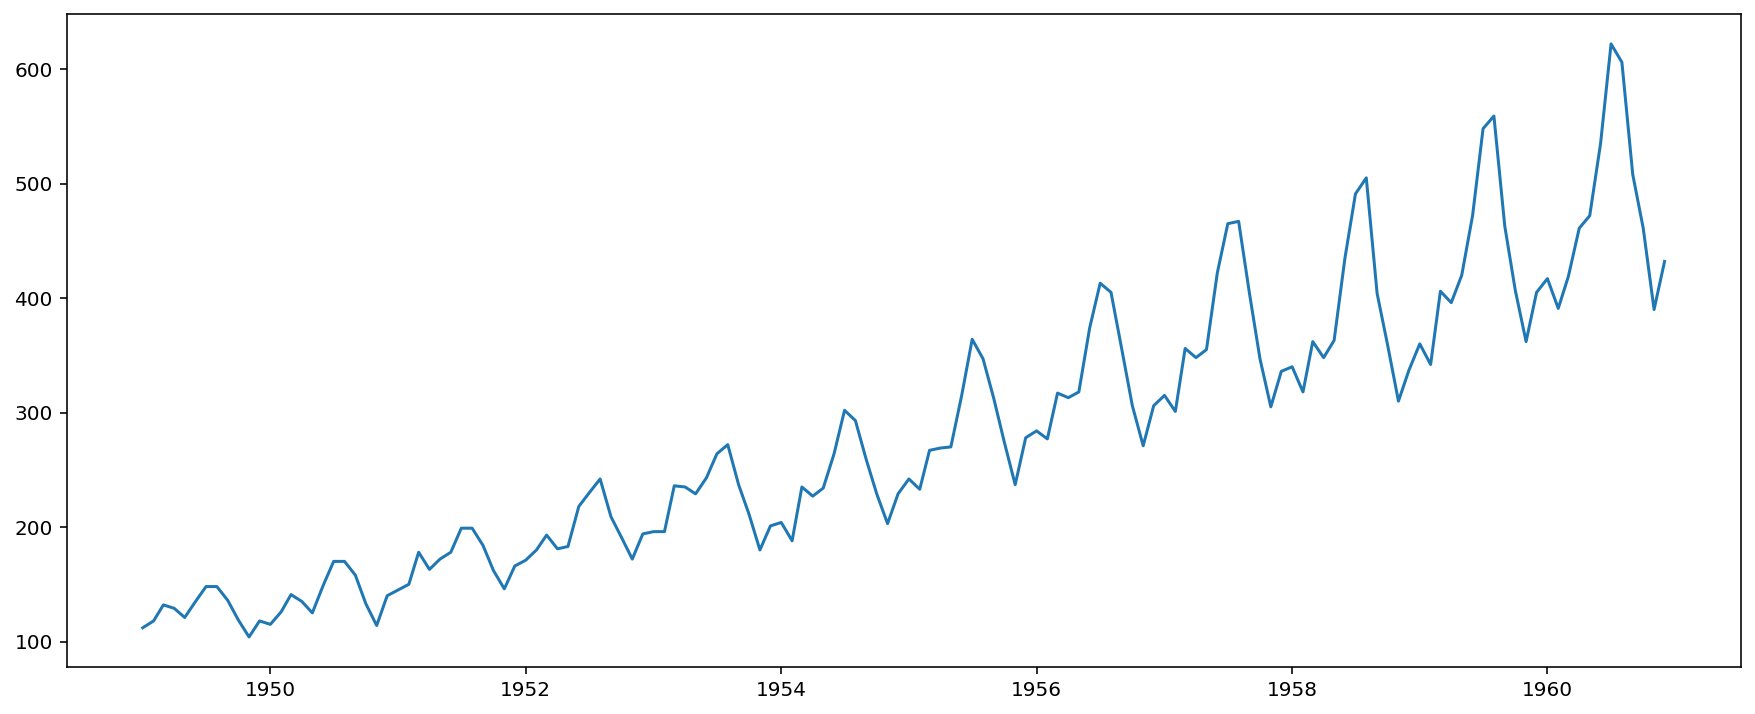

In [14]:
# data 그래프 그려보기
ts2 = df['Passengers']
plt.plot(ts2)

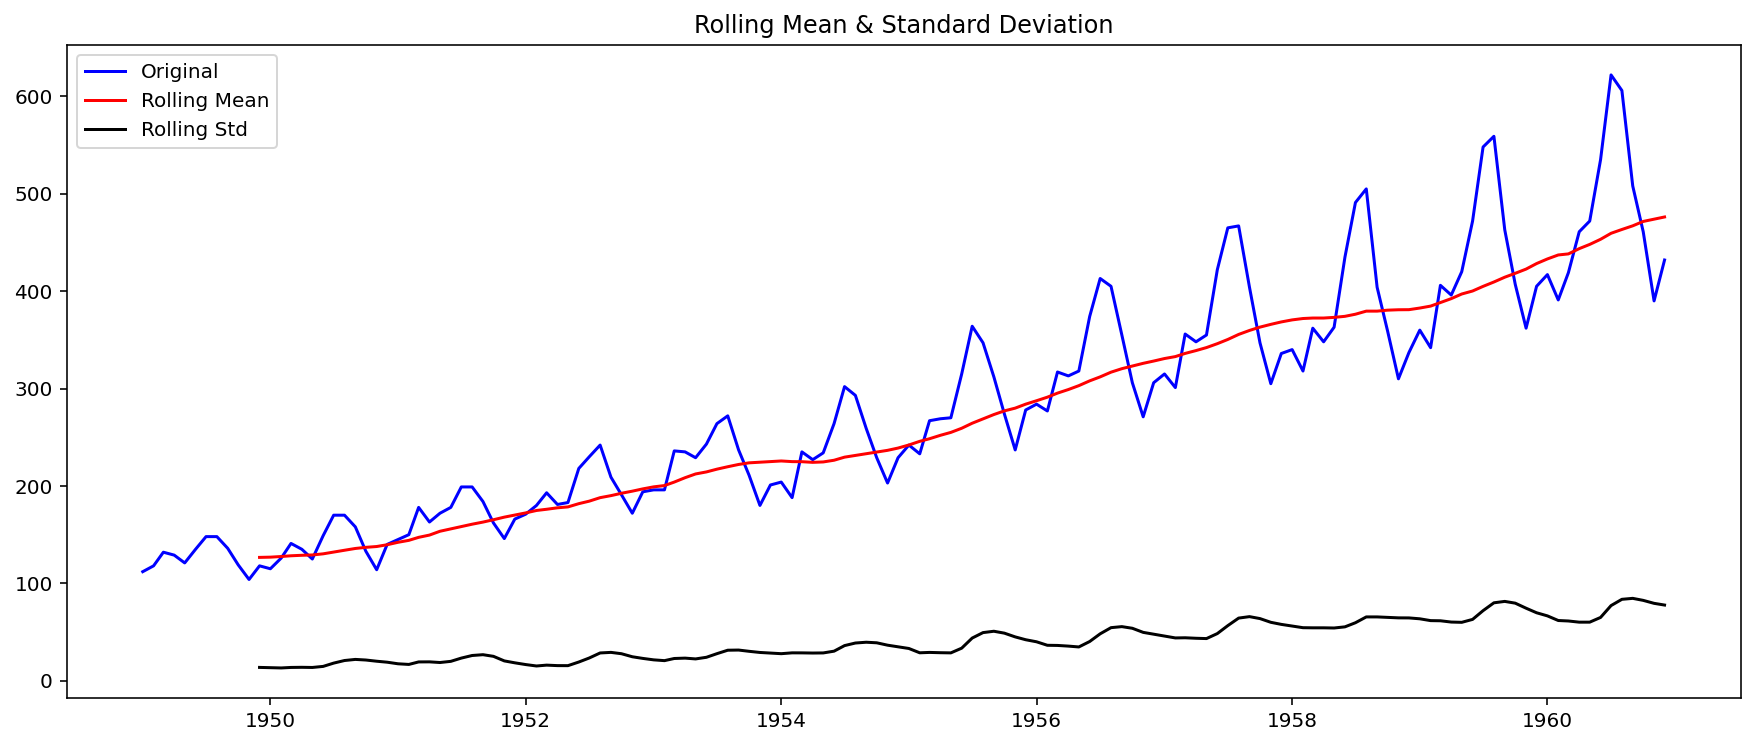

In [15]:
# 이동평균 / 표준편차까지 같이 
plot_rolling_statistics(ts2, window=12)

In [16]:
# 이동평균과 / 표준편차가 증가하고 있는 추세로 보여 시계열 데이터가 불안정함.

## Augmented Dickey-Fuller Test
-주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후, 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다는 내용입니다.

### statsmodels package install
```

pip install statsmodels

```
#### statsmodels.tsa.adfuller 
```
입력 인수

x : 시계열 자료
maxlag : ADF 검정에 사용할 시차의 수. 디폴트 12*(nobs/100)^{1/4}
regression : 검정 사용할 모형.
'nc': 결정론적 추세 없음. DF 검정
'c': 상수항만 사용
'ct': 상수항과 1차 추세 사용
'ctt': 상수항과 1차 추세, 2차 추세 사용
autolag : 검정 AR 모형의 차수를 자동 결정하는 알고리즘 {‘AIC’, ‘BIC’, ‘t-stat’, None}
반환값

adf : 검정 통계량
pvalue : MacKinnon(1994) 방식을 사용한 p-value 추정치
usedlag : 사용된 시차의 수
nobs : 분석에 자료의 수
critical values : 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값
실제로 시뮬레이션으로 생성된 시계열 자로에 대해 ADF 검정을 실시해 본다.
```

In [17]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [18]:
# 가져온 데이터가 시계열이 안정적이 않다는 귀무가설...
# 
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [19]:
# pv가 0.01보다 작기 때문에 귀무가설 기각 대립가설 성립

In [20]:
# 두번째 데이터 귀무가설 check
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
# p-v 가 1에 가깝기 때문에 귀무가설 옳을 것이다. .....

## 안정적인 데이터로

### log(  ) - 이동평균(moving average)

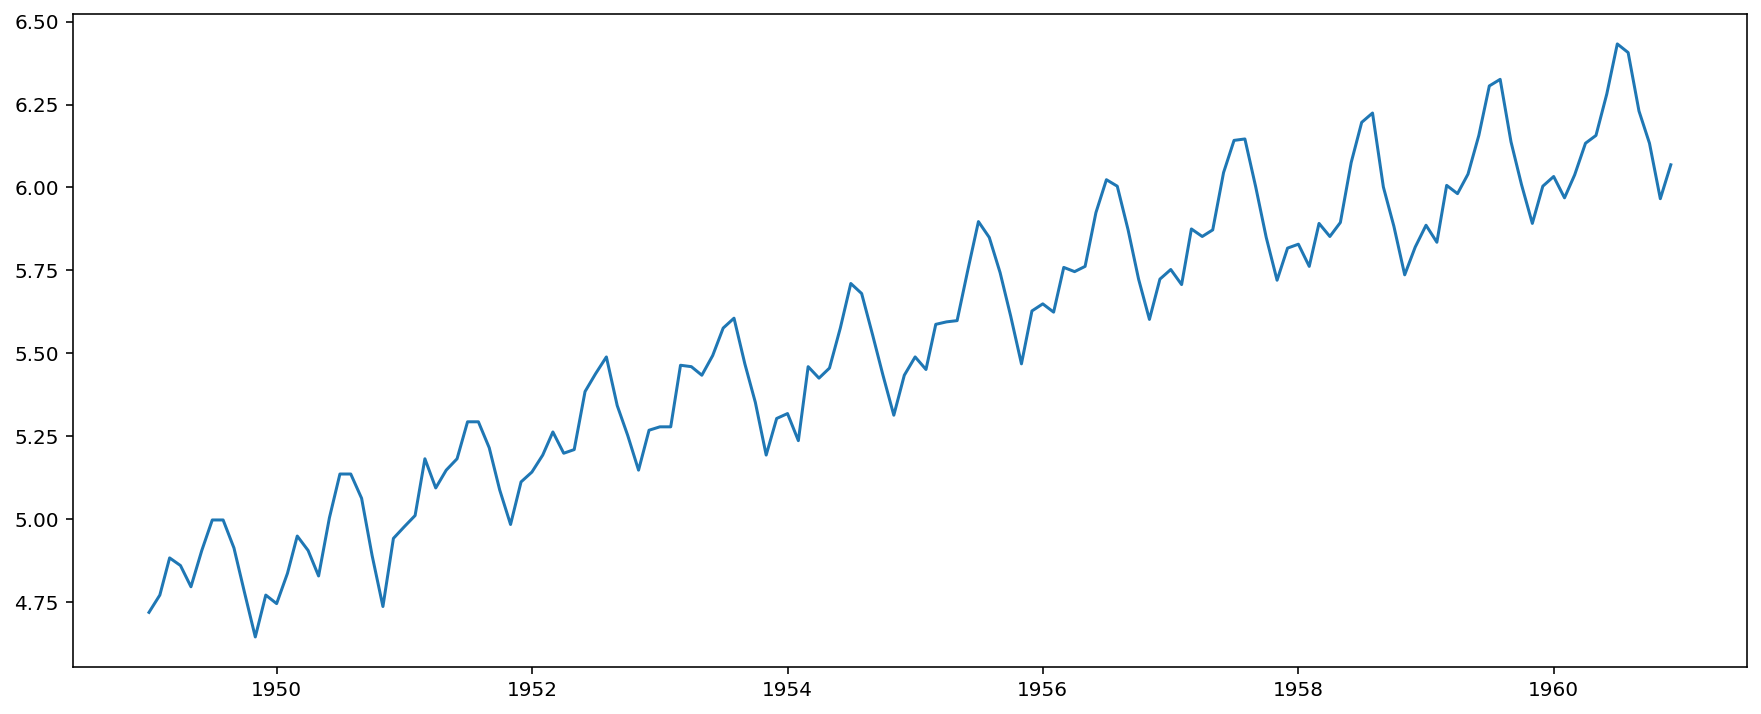

In [22]:
# 로그함수로 변환
ts_log = np.log(ts2)


In [23]:
# 로그 함수로 변환 한값 . 시계열 test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


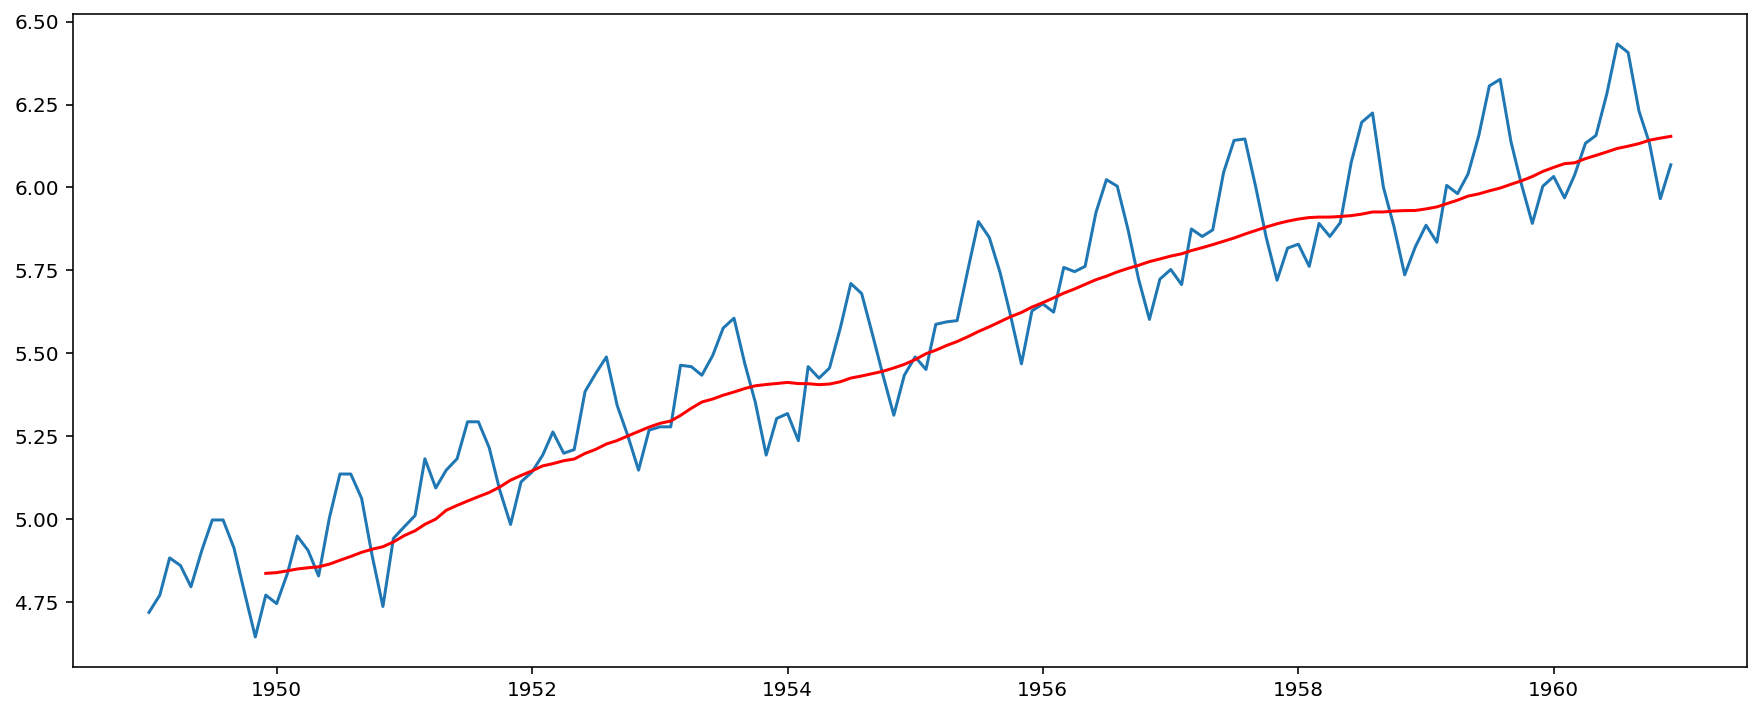

In [24]:
# moving average 제거(trend 상쇄)
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [25]:
# 이동 평균을 빼주어 trend가 상쇄
# window 12 앞에 11개 는 이동평균 이 없어서 nan 오류 남.
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [26]:
#nan 숙청
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

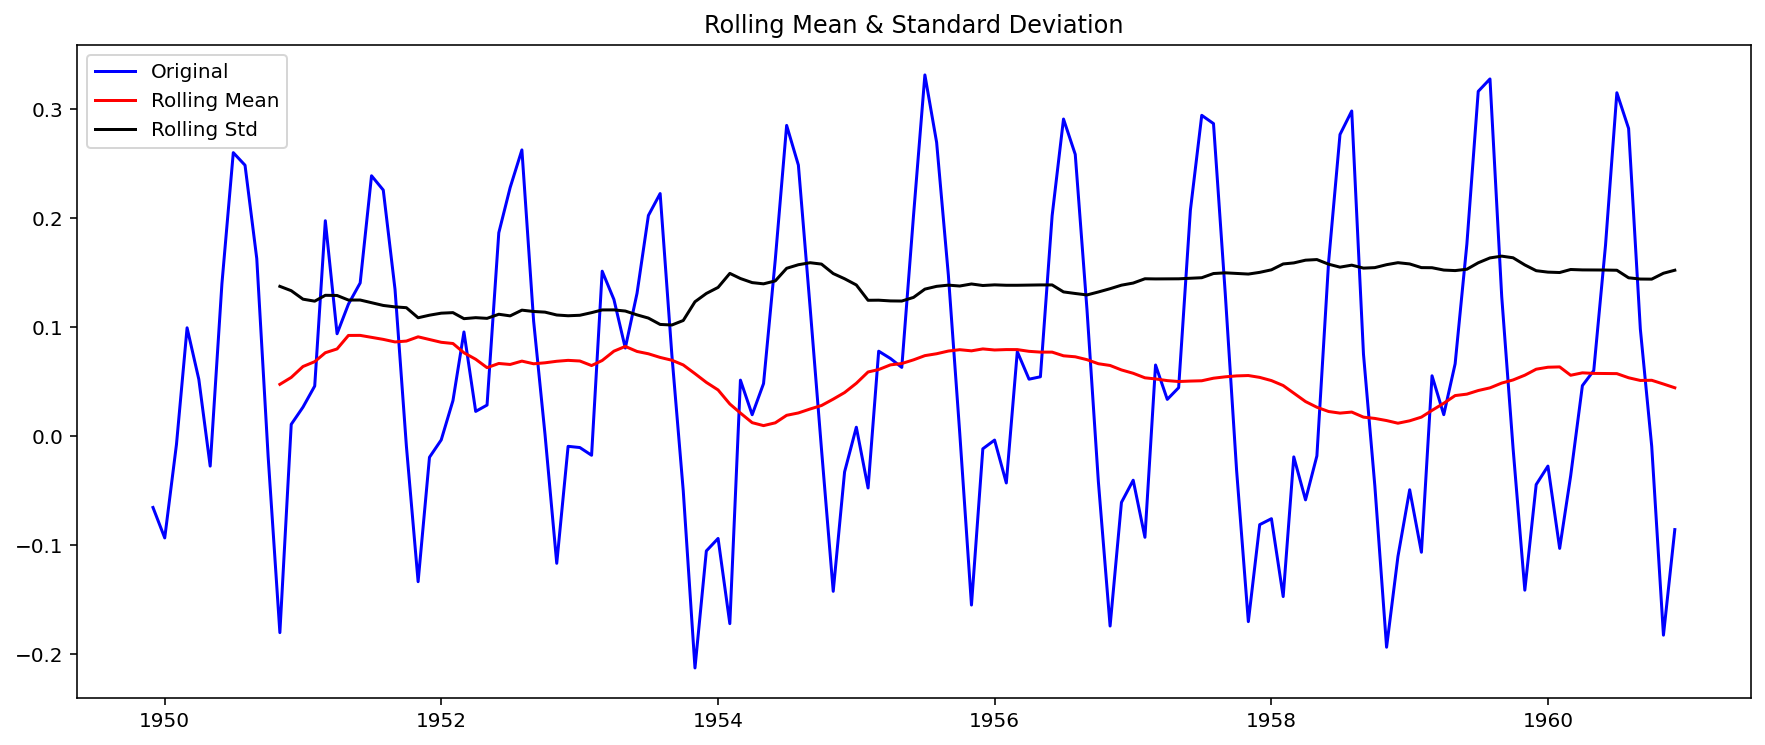

In [36]:
# 다시 시계열 test
plot_rolling_statistics(ts_log_moving_avg)

# 이동 평균관 표준편차가 상대적 일정해짐.

In [27]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [38]:
# p - value  도 0.02로 귀무가설 파괴 대립가설 등장


In [39]:
# window<를 6으로 바꾸면..........
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')


슝=3


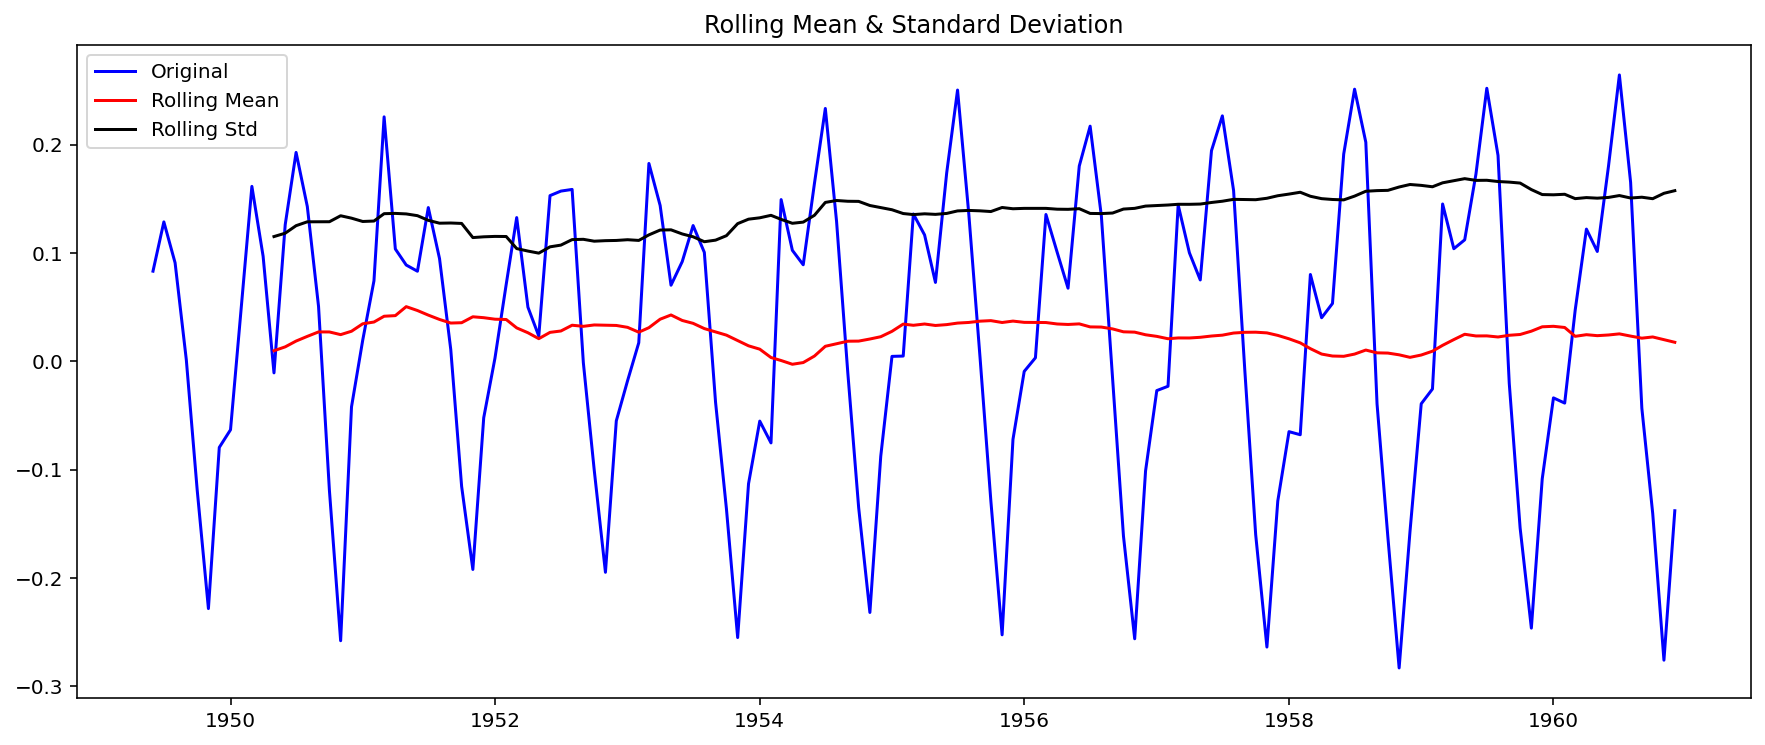

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [40]:
plot_rolling_statistics(ts_log_moving_avg_6)
augmented_dickey_fuller_test(ts_log_moving_avg_6)

# 유사한데 p value는 높음.
# 즉 12 단위로 주기성이 있다고 볼수 있음.

### 차분(Differencing) - Seasonality 상쇄하기

<class 'pandas.core.series.Series'>


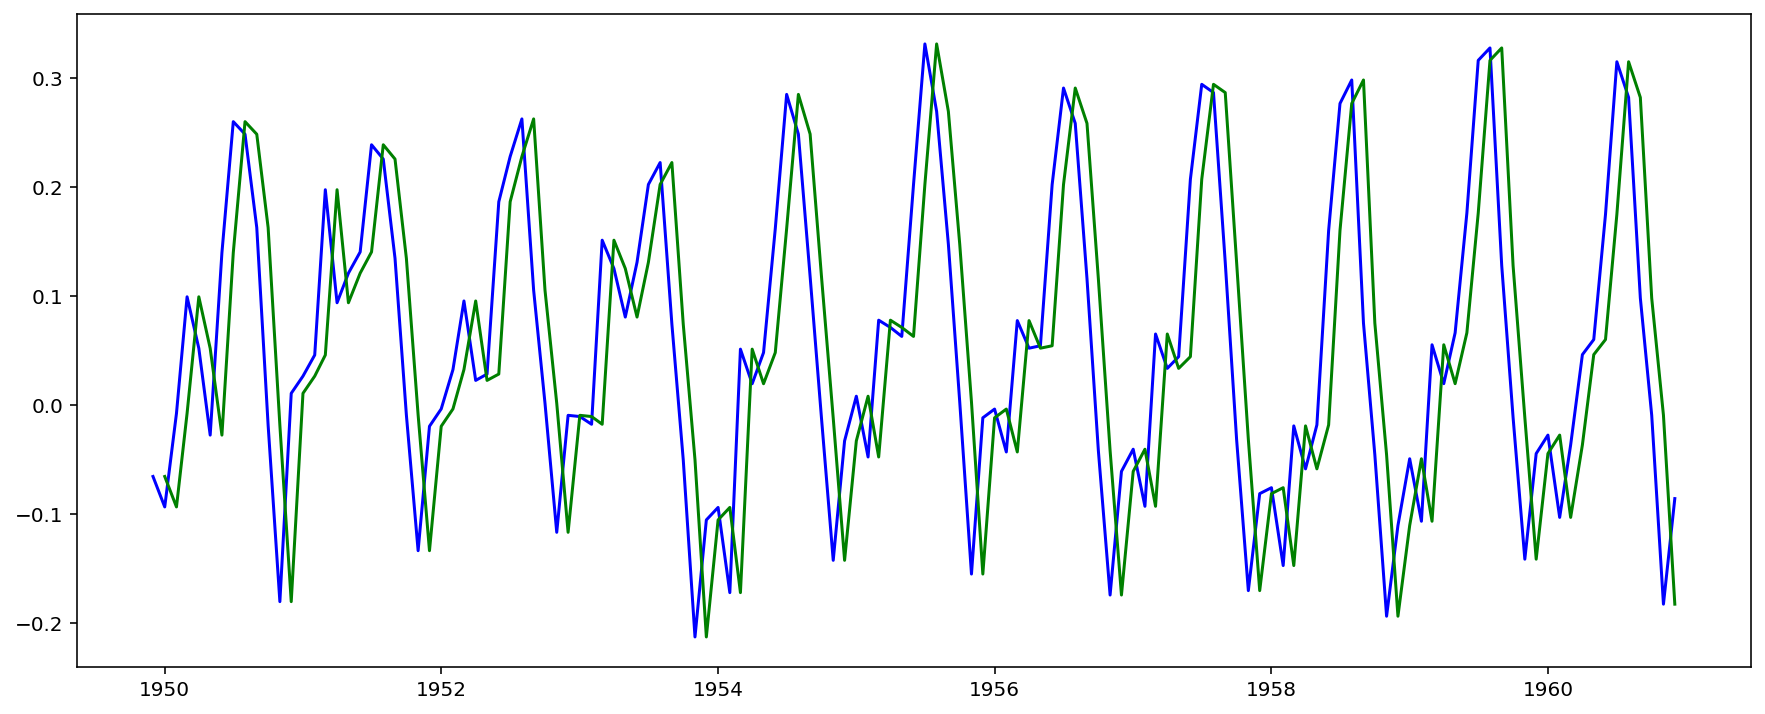

In [45]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()
print(type(ts_log_moving_avg))
plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

Month
1949-12-01         NaN
1950-01-01   -0.027955
1950-02-01    0.085883
1950-03-01    0.106981
1950-04-01   -0.047274
                ...   
1960-08-01   -0.032788
1960-09-01   -0.184128
1960-10-01   -0.107465
1960-11-01   -0.173460
1960-12-01    0.096901
Name: Passengers, Length: 133, dtype: float64


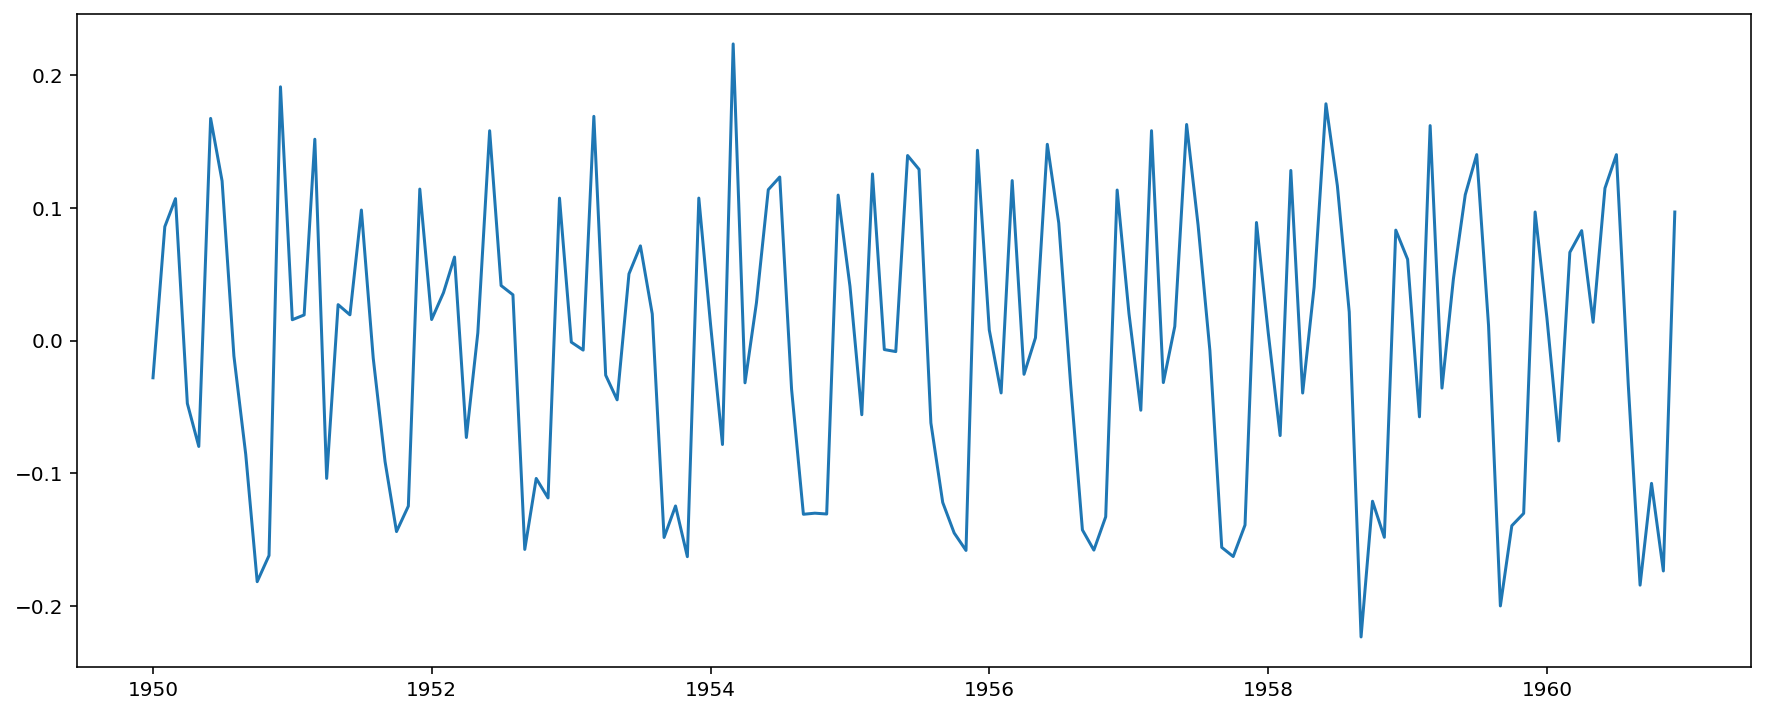

In [44]:
# 현제 값과 직전 값을 차를 그래프로~
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

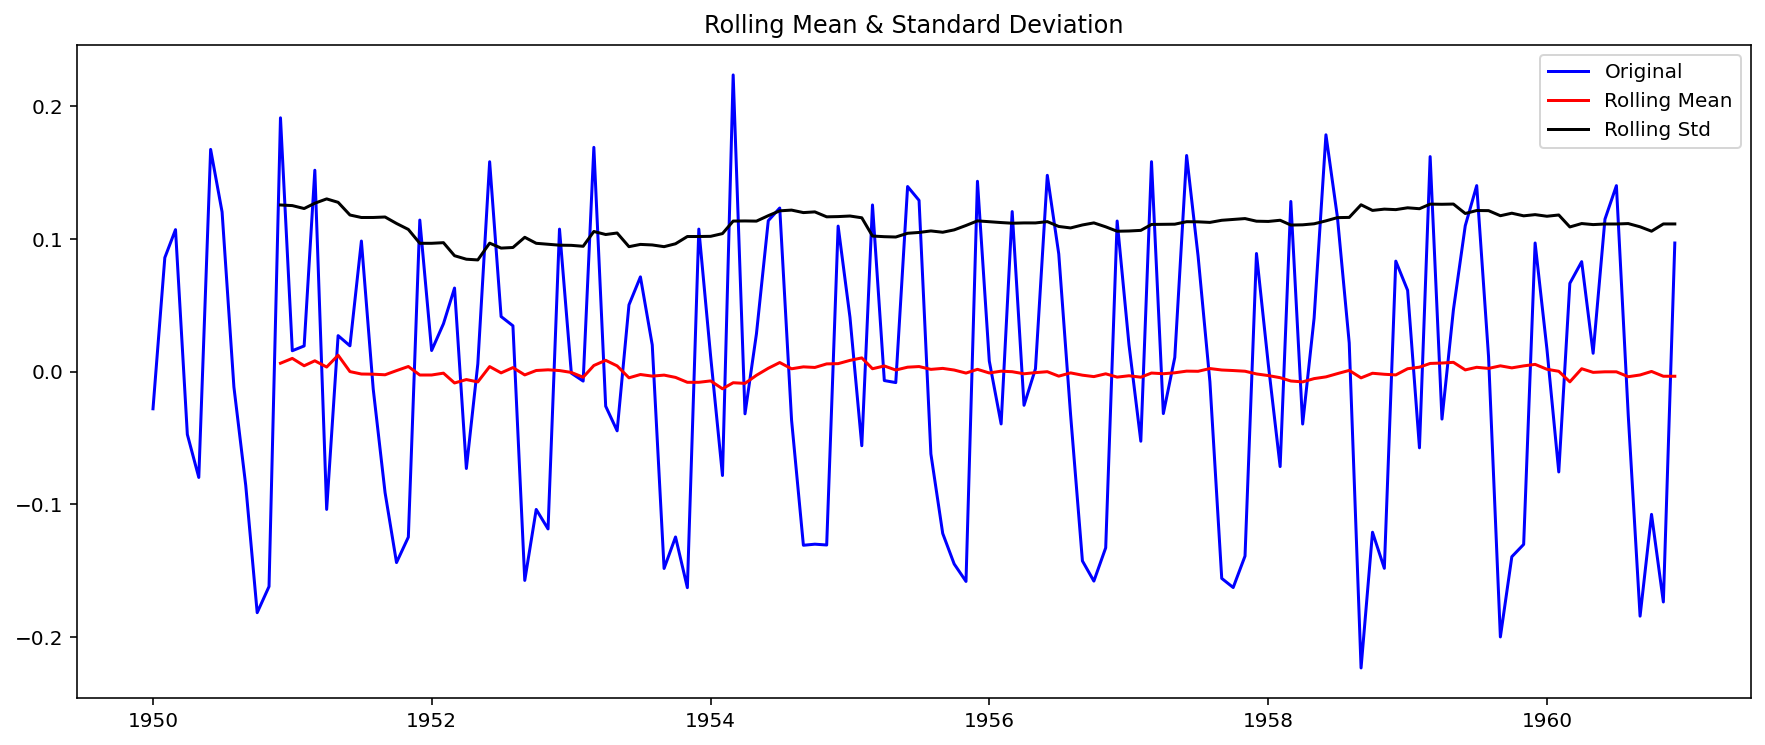

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [47]:
# 
plot_rolling_statistics(ts_log_moving_avg_diff)
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

## 시계열 분해

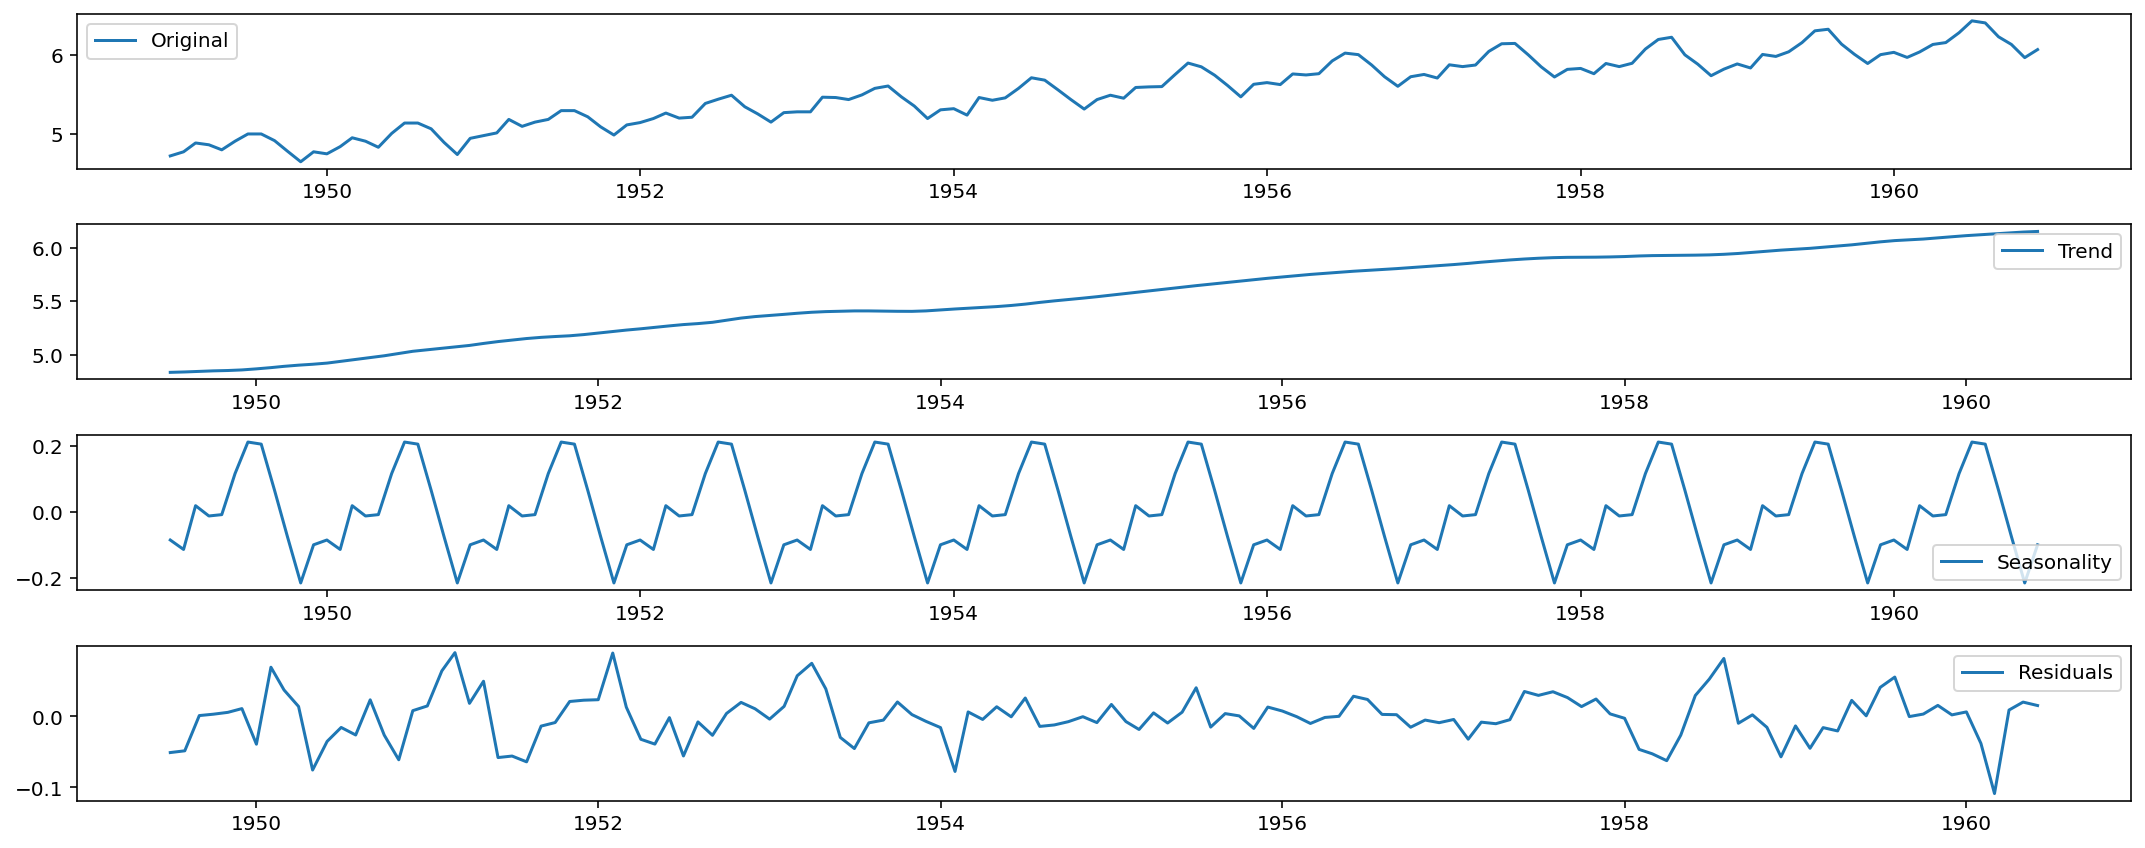

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 이동평균
seasonal = decomposition.seasonal #차분상쇄
residual = decomposition.resid # 위에꺼 둘돠

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [55]:
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

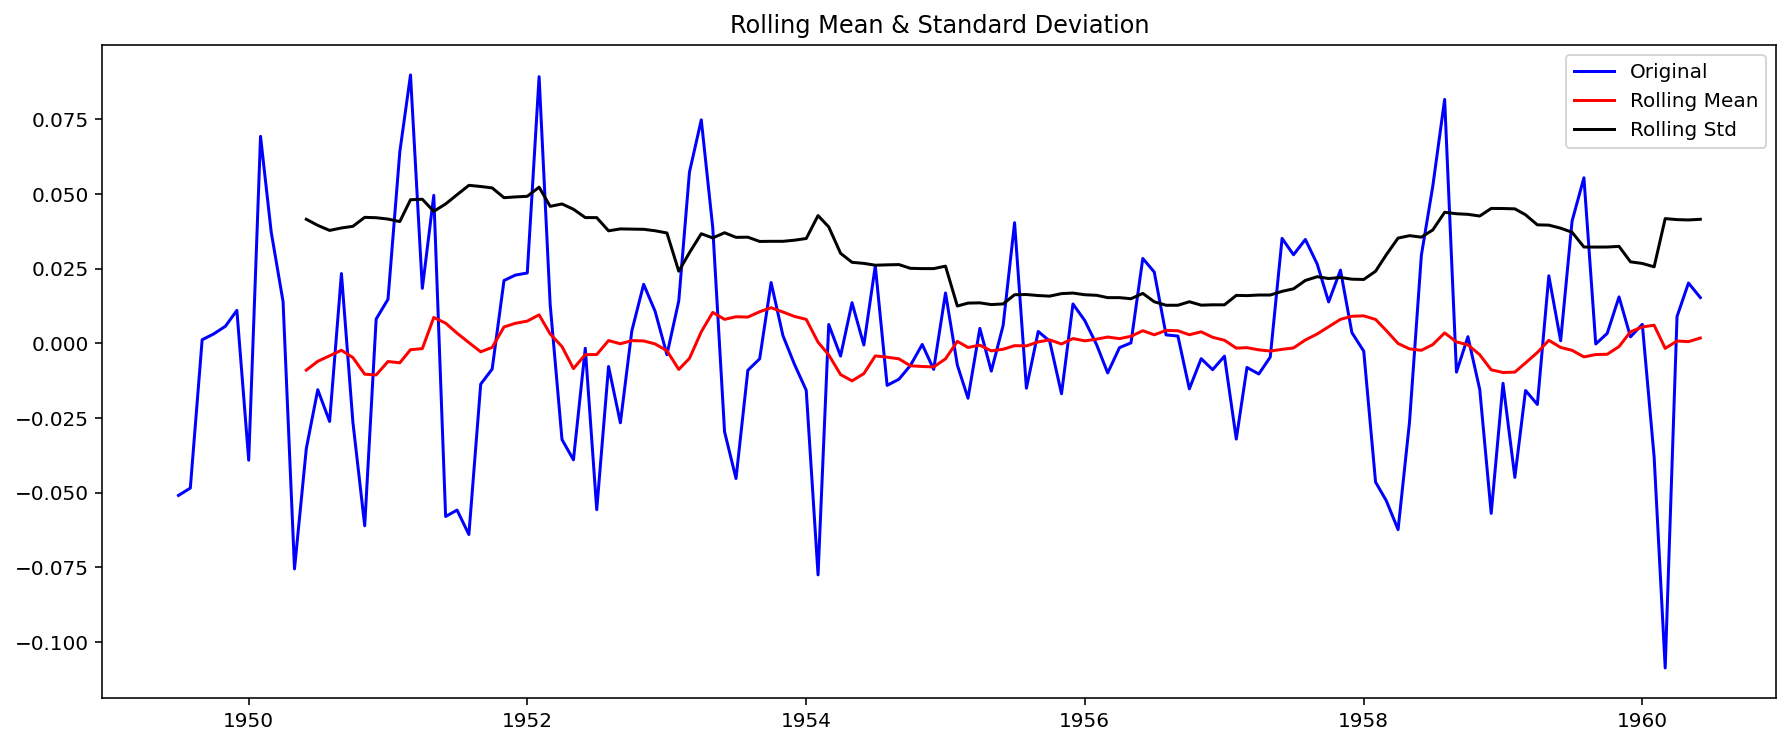

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [53]:
# Residual 로 확인
plot_rolling_statistics(residual) # 그래프
residual.dropna(inplace=True) # nan 제거
augmented_dickey_fuller_test(residual) # 귀무가설 확인